In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# run function with Zernike definition
%run zernike.py

Text(-4, -1.7, 'Azimuthal order')

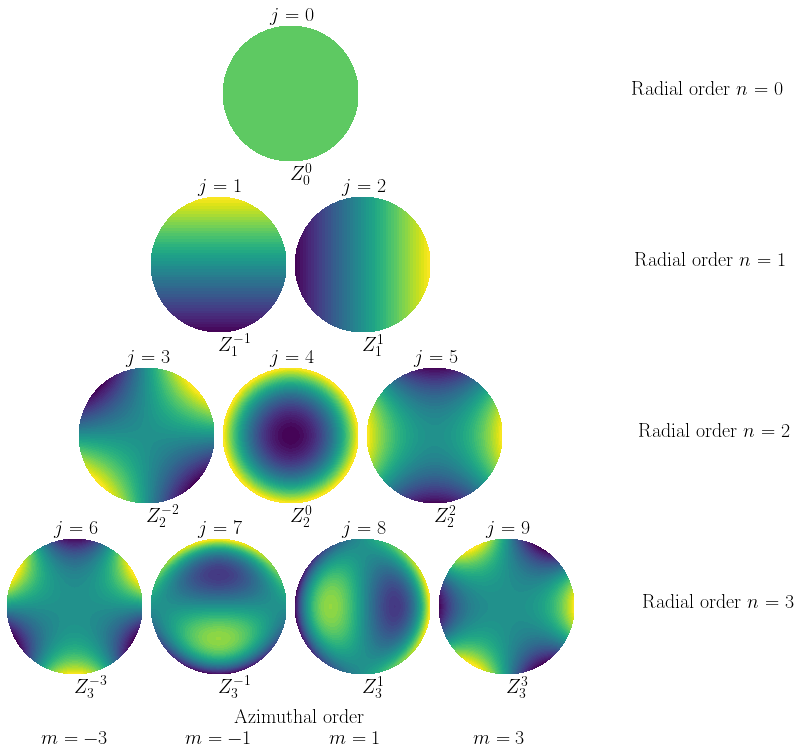

In [2]:
N=100

theta=np.linspace(0,2*np.pi, N)
rho=np.linspace(0,0.99,N)

THETA,RHO=np.meshgrid(theta,rho)
THETA=np.reshape(THETA, N*N)
RHO=np.reshape(RHO, N*N)

xx=RHO*np.cos(THETA)
yy=RHO*np.sin(THETA)


zn = np.array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3])
zm = np.array([0, -1, 1, -2, 0, 2, -3, -1, 1, 3])
fig = plt.figure(figsize=(10, 10))

nmax=4
# Create up to the maximum row
gs = gridspec.GridSpec(nmax, nmax)

j=0
margin=0.05
height=(1-(nmax+1)*margin)/nmax
width=height

for n in range(0,nmax):
    marray=np.linspace(-n, n, n+1, endpoint=True, dtype=int)
    for m in marray:
        W=np.reshape(zernike(n,m, xx, yy), (N,N))
        lf=m*0.1
        bt=(nmax-n)*margin+(nmax-1-n)*height
        ax = fig.add_axes([lf, bt, width, height])
        noll=0.5*(n*(n+2)+m)
        ax.set_title(f'$j='+str(int(noll))+'$', fontsize=20)
        if n==0:
            levels=[-1, 0, 1]
        else:
            levels=np.linspace(np.min(W), np.max(W), 50)
        ax.text(0, -1.25, '$Z_'+str(n)+'^{'+str(m)+'}$', fontsize=20)
        ax.contourf(np.reshape(xx, (N,N)),np.reshape(yy, (N,N)),W, [-1,1], extend='both', origin='upper', levels=levels)
        ax.axis('off')
        if n==nmax-1:
            ax.text(-0.5,-2, '$m=' + str(m) +'$', fontsize=20, rotation='horizontal')            
        j+=1
    ax.text(5-n,0, 'Radial order $n=' + str(n) +'$', fontsize=20)
ax.text(-4,-1.7, 'Azimuthal order', fontsize=20, rotation='horizontal')